In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
#Read Ticker Data

ticker_data1 = pd.read_csv('../Project2/AMZN.csv')

#Drop Invalid/NaN values
ticker_data2 = ticker_data1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

#Remove non-categorial date column from training data
ticker_data = ticker_data2.drop(['Date'], axis=1)

# Use the 3 scores as features
feature_cols = ['Social_Scores','Environment_Scores','Sentiment_Scores']
ticker_data = pd.get_dummies(ticker_data, columns = feature_cols)

#Separate the dependent and independent data variables into two data frames and use Returns as the target
#X = ticker_data.drop(['Returns'],axis=1)
X = ticker_data
Y = ticker_data['Returns']

# Split the dataset into 80% training data and 20% testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

#Build the Decision Tree Model on our dataset and print the returns predictions
#Use Regressor model since the returns data consists of floats and is not int/continous
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
DT_predict = DT_model.predict(X_test)

In [3]:
#Read returns into df
Returns_df = pd.DataFrame(Y)

In [4]:
#set predicted returns so they will appear as projections 
AMZNpredictions_df = pd.DataFrame(DT_predict)
AMZNpredictions_df.columns =['Predicted_Returns']
df_0 = pd.DataFrame(0, index=range(262), columns=range(0))
AMZNpredictions_df = df_0.append(AMZNpredictions_df, ignore_index=True).fillna(0)

In [5]:
#combine both df's
Predictions_df = pd.concat([Returns_df, AMZNpredictions_df], axis=1).fillna(0)
Predictions_df

,Returns,Predicted_Returns
0,0.024949,0.000000
1,0.025498,0.000000
2,-0.009190,0.000000
3,0.001224,0.000000
4,0.023035,0.000000
...,...,...
310,0.000000,0.003238
311,0.000000,-0.013471
312,0.000000,-0.007889
313,0.000000,-0.022941


In [6]:
#shift 1 to align with next day
Predictions_df = Predictions_df['Predicted_Returns'].shift(1)

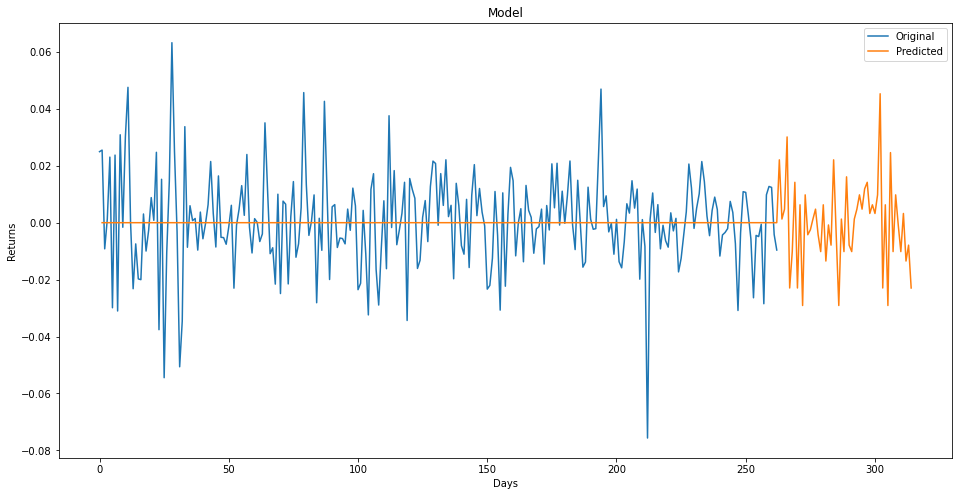

In [7]:
#plot original returns and predicted returns
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Returns')
plt.plot(ticker_data1['Returns'])
plt.plot(Predictions_df)
plt.legend(["Original",'Predicted'])
plt.show()